**Breast cancer prediction**

In this notebook a dataset from Kaggle is used in order to predict whether a tumor is malignant or benign using Support Vector Machine 

In [136]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score

In [41]:
dataset=pd.read_csv('dataset/data.csv')

(569, 33)

**Data Analysis**

In [175]:
dataset.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [174]:
dataset.shape

(569, 33)

In [42]:
dataset.groupby('diagnosis').max()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,911320502,17.85,33.81,114.6,992.1,0.1634,0.2239,0.4108,0.08534,0.2743,...,41.78,127.1,1210.0,0.2006,0.5849,1.252,0.175,0.4228,0.1486,NaN
M,911296202,28.11,39.28,188.5,2501.0,0.1447,0.3454,0.4268,0.20120,0.3040,...,49.54,251.2,4254.0,0.2226,1.0580,1.170,0.291,0.6638,0.2075,NaN


<Axes: >

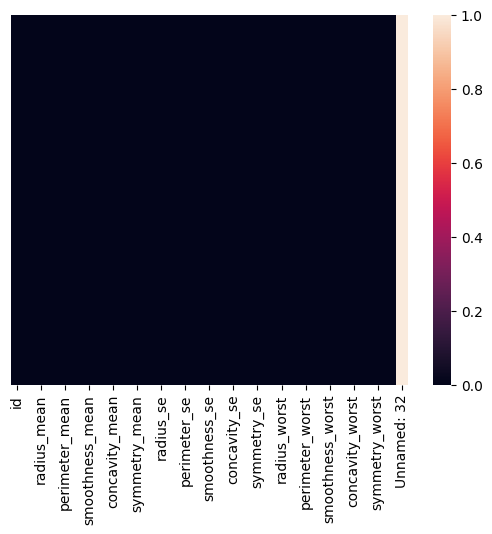

In [43]:
sns.heatmap(dataset.isnull(), yticklabels=False)

**Data visualization**

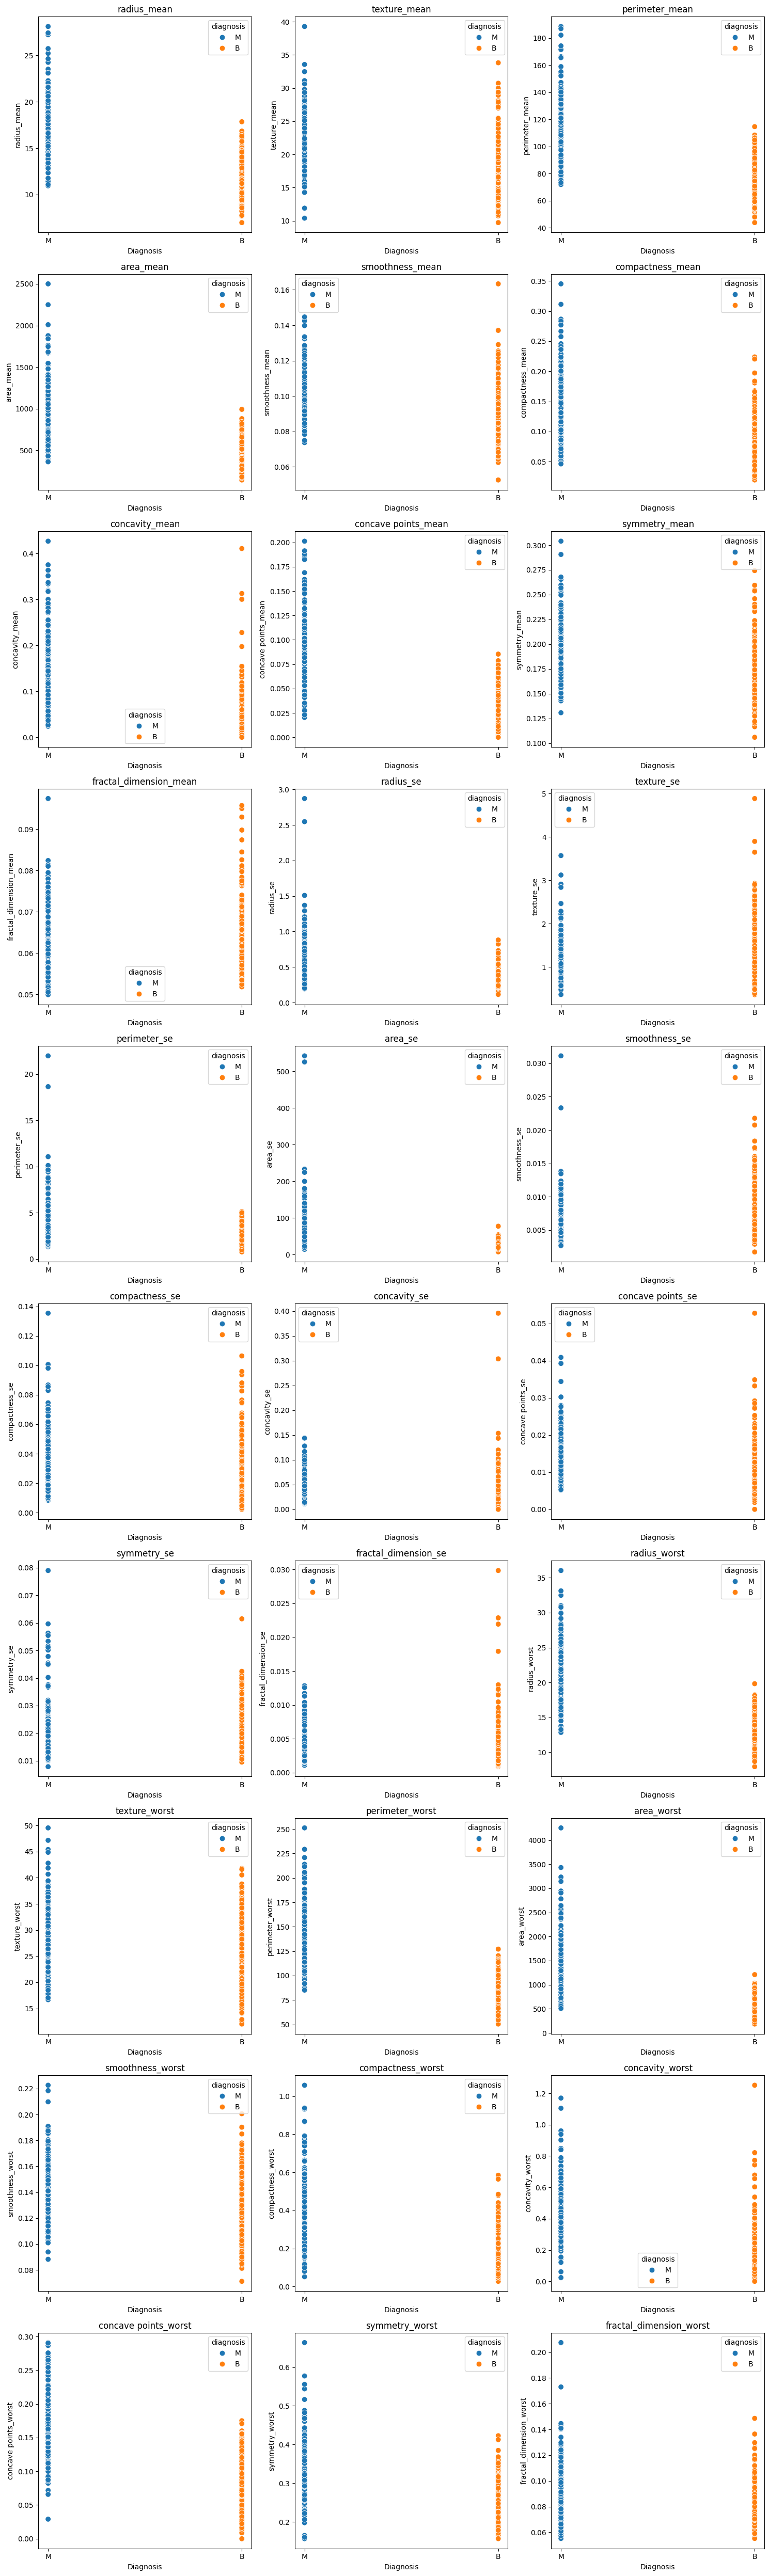

In [130]:
columns=list(dataset.columns)
columns.remove("id")
columns.remove("diagnosis")
columns.remove("Unnamed: 32")

num_rows=(len(columns))//3
fig,axs =plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))
axs = axs.flatten()
for i,col in enumerate(columns):
  sns.scatterplot(x='diagnosis', y=col, s=60, hue='diagnosis', data=dataset, ax=axs[i])
  axs[i].set_title(f'{col}');
  axs[i].set_xlabel('Diagnosis');
  axs[i].set_ylabel(col);


plt.tight_layout()


plt.show()



In [45]:
X=dataset.drop(['id','Unnamed: 32','diagnosis'], axis=1)
Y=dataset['diagnosis'].replace({'M': '1', 'B': '0'})


In [46]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [47]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: object

**Standardize Data**

Standardize features by removing the mean and scaling to unit variance.

The standard score of a sample x is calculated as:

*z = (x - u) / s*

In [48]:
scaler = StandardScaler()
X=scaler.fit(X).transform(X)
X


array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

**Data splitting**

Here we split the data, where 30% of the dataset will be used for testing the model and 70% will be used for training the model.

In [131]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.3, random_state=4, stratify=Y)

**Model training**

In [133]:
classifier=svm.SVC(kernel='linear')

In [134]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Testing the model on training data:

In [141]:
X_train_prediction=classifier.predict(X_train)
trainingdata_accuracy=accuracy_score(X_train_prediction, Y_train)
print("Accuracy score on training data: ",trainingdata_accuracy )


Accuracy score on training data:  0.9899497487437185


Testing the model on test data:

In [181]:
X_test_prediction=classifier.predict(X_test)
testdata_accuracy=accuracy_score(X_test_prediction, Y_test)
print("Accuracy score on unseen data: ",testdata_accuracy )


Accuracy score on unseen data:  0.9532163742690059


In [182]:

def tumorClassification(list):
  input_array=np.asarray(list)
  input_reshape=input_array.reshape(1,-1)
  input_standarized=scaler.transform(input_reshape)
  pred=classifier.predict(input_standarized)
  if(pred[0]=='1'):
    return "Malignent"
  else:
    return "Benign"

In [183]:
data_for_malignent_tumor=(20.57, 17.77,	132.9,	1326,	0.08474,	0.07864,	0.0869,	0.07017,	0.1812,	0.05667,	0.5435,	0.7339,	3.398,	74.08,	0.005225,	0.01308,	0.0186,	0.0134,	0.01389,	0.003532,	24.99,	23.41,	158.8,	1956,	0.1238,	0.1866,	0.2416,	0.186,	0.275,	0.08902)
data_for_benign_tumor=(13.54, 14.36, 87.46, 566.3, 0.09779, 0.08129, 0.06664, 0.04781, 0.1885, 0.05766, 0.2699, 0.7886, 2.058, 23.56, 0.008462, 0.0146, 0.02387, 0.01315, 0.0198, 0.0023, 15.11, 19.26, 99.7, 711.2, 0.144, 0.1773, 0.239, 0.1288, 0.2977, 0.07259)

print(tumorClassification(data_for_malignent_tumor))
print(tumorClassification(data_for_benign_tumor))


Malignent
Benign


/Users/samer/.pyenv/versions/3.7.3/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/samer/.pyenv/versions/3.7.3/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
